<div align='center'>
<font size = 7><font face="Product-Sans"><b><font color= "4285F4">G</font><font color= "DB4437">o</font><font color = "F4B400">o</font><font color= "4285F4">g</font><font color= "0F9D58">l</font><font color= "DB4437">e</font></b></font> - <font color = "C99700">Notre Dame</font></a> <font color = "4285F4">XLS Playground</font></font>
</div>

<div align='center'>
<img src='https://google.github.io/xls/images/xls_logo.svg' alt='XLS Logo' width=400><img src='https://raw.githubusercontent.com/mmorri22/cse30342/main/ND%20Chip%20Logo.png' alt='ND Chip Logo' width=180>
<img src="https://opensource.google/static/images/os-anim-main.gif" width=180>
</div>

<div align='center'>
<font size = 6><font color = "00843D">Lecture 25 In-Class Solution - Advanced Combinational Logic</font></a></font>
</div>

## XLS Setup

For each new Colab notebook, you will need to run the XLS setup again. If your computer switches networks, or you restart, you will need to run those commands again. This consists of the same two setup steps from Chapter 1. You must run both in order to properly run the XLS flow.

> Note: Here is the common error message that will occur if you ran a DSLX cell and you need need to re-run the setup. If you encounter this message, simply re-run these two steps and the error will be resolved when you go back to that cell:
>
> <code>UsageError: Cell magic `%%dslx` not found.</code>

# <font color = "red">Design Run Setup</font>

## To set up the design flow, run the next cell to set up the back end of XLS

> You will need to run this setup at every new runtime instance.

In [ ]:
#@title Start-up Step 1: XLS and OpenRoad scripts {run:"auto"}

!rm -rf *

# Import required Python libraries
import os
import pathlib
import sys
import jinja2
import IPython.display
import PIL.Image
import graphviz
import pathlib

from IPython.display import display, display_png

# Set Stable XLS Version for classroom environment
xls_version = 'v0.0.0-4699-gfb023174' #@param {type:"string"}

!echo '📦 downloading xls-{xls_version}'
!curl --show-error -L https://github.com/proppy/xls/releases/download/{xls_version}/xls-{xls_version}-linux-x64.tar.gz | tar xzf - --strip-components=1
!echo '🧪 setting up colab integration'
!python -m pip install --quiet --no-cache-dir --ignore-installed https://github.com/proppy/xls/releases/download/{xls_version}/xls_colab-0.0.0-py3-none-any.whl
!python -m pip install logger
!python -m pip install colabtools
import logger
import xls.contrib.colab
_ = xls.contrib.colab.register_dslx_magic()

# Must verify xls_work_dir is created
!if test -d xls_work_dir; then echo "xls_work_dir exists"; else mkdir xls_work_dir;  fi

#@title  First Run Only #4 - OpenRoad Setup {run:"auto"}

yosys_version = '0.38_93_g84116c9a3' #@param {type:"string"}
openroad_version = '2.0_12381_g01bba3695' #@param {type:"string"}
rules_hdl_version = '2eb050e80a5c42ac3ffdb7e70392d86a6896dfc7' #@param {type:"string"}

# Install stable OpenROAD Version
!echo '🛣️ installing openroad and friends'
!curl -L -O https://repo.anaconda.com/miniconda/Miniconda3-py310_24.1.2-0-Linux-x86_64.sh
!bash Miniconda3-py310_24.1.2-0-Linux-x86_64.sh -b -p conda-env/
import pathlib
conda_prefix_path = pathlib.Path('conda-env')
CONDA_PREFIX = str(conda_prefix_path.resolve())
%env CONDA_PREFIX={CONDA_PREFIX}
!conda-env/bin/conda install -yq -c "litex-hub" openroad={openroad_version} yosys={yosys_version}

!python -m pip install gdstk tqdm

!gsutil cp gs://proppy-eda/pdk_info_asap7.zip .
!gsutil cp gs://proppy-eda/pdk_info_sky130.zip .

!unzip -q -o pdk_info_asap7.zip
!unzip -q -o pdk_info_sky130.zip

!echo '🧰 generating PDK metadata'
!curl --show-error -L  https://github.com/hdl/bazel_rules_hdl/archive/{rules_hdl_version}.tar.gz | tar xzf - --strip-components=1
!curl -L -O https://github.com/protocolbuffers/protobuf/releases/download/v24.3/protoc-24.3-linux-x86_64.zip
!unzip -q -o protoc-24.3-linux-x86_64.zip
!{sys.executable} -m pip install protobuf

!echo '📁 organizing PDK for XLS and OpenROAD Flows'
!wget https://raw.githubusercontent.com/mmorri22/cse30321/main/xls/xls_setup.py
!wget https://raw.githubusercontent.com/mmorri22/cse30321/main/xls/sky130_data_pdk_info.textproto
!python xls_setup.py
!mv /content/sky130_data_pdk_info.textproto /content/com_google_skywater_pdk_sky130_fd_sc_hd/sky130_data_pdk_info.textproto
!echo '🖼️ Setup for viewing 3D GDSII File'
!python -m pip install numpy
!python -m pip install gdspy
!python -m pip install numpy-stl
!python -m pip install triangle
!python -m pip install k3d

# gdspy is used to open the gds file
import gdspy

# Used to write the output stl file (Why we installed numpy-stl)
from stl import mesh

# Using numpy will permit fast calculations on lots of points
import numpy as np
import matplotlib

# Required to triangulate polygons
import triangle

# To render in 3d
import k3d

📦 downloading xls-v0.0.0-4699-gfb023174
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 40.8M  100 40.8M    0     0  9493k      0  0:00:04  0:00:04 --:--:-- 10.8M
🧪 setting up colab integration
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.1/182.1 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for logger: filename=logger-1.4-py3-none-any.whl size=1759 sha256=9200381d1d3d936be48e38230c9f87e6549e1ef9115b746d0ba244bfd967ac84
  Stored in directory: /root/.cache/pip/wheels/fb/19/7b/09fc73f7503166eaf7f31b4aa0095b7f78af2ec0898e1f8312
Successfully built logger
[18/Apr/2024 08:50:23] INFO - NumExpr defaulting to 2 threads.
xls_work_dir exists
🛣️ installing openroad and friends
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
            

In [ ]:
#@title Start-up Step 2: Select your PDK {run:"auto"}

pdk = 'sky130' #@param ["asap7", "sky130"] {allow-input: false}

xls.contrib.colab.pdk = pdk


#@title Select your PDK {run:"auto"}

!bin/protoc --python_out=. pdk/proto/pdk_info.proto
!ln -sf pdk/proto/pdk_info_pb2.py
import pdk_info_pb2

import enum
import dataclasses
import json
import pathlib
import subprocess
from typing import Any, Callable, Dict, Optional, Union

from google.colab import widgets
from google.protobuf import text_format
import pandas as pd

yosys = conda_prefix_path / 'bin/yosys'
openroad = conda_prefix_path / 'bin/openroad'
yosys_tcl = 'synthesis/synth.tcl'

default_work_dir = xls.contrib.colab.default_work_dir

def pdk_info_proto(
    path: pathlib.Path, optional: bool = False
) -> Optional[pdk_info_pb2.PdkInfoProto]:
  """Load PDK info from prototext.

  Args:
    path: path to prototext file.
    optional: if True, failure to access the pdk info will not produce an error.

  Returns:
    Decoded pdk info proto or None if optional.
  """
  if optional and not path.exists():
    return None
  with path.open('r') as f:
    proto = pdk_info_pb2.PdkInfoProto()
    text_format.Parse(f.read(), proto)
    return proto

pdks = {

    'asap7': {
        'delay_model': 'asap7',
        'pdk_info': pdk_info_proto(
            pathlib.Path('asap7/asap7_data_pdk_info.textproto'),
        ),
    },

    'sky130': {
        'delay_model': 'sky130',
        'pdk_info': pdk_info_proto(
            pathlib.Path('com_google_skywater_pdk_sky130_fd_sc_hd/sky130_data_pdk_info.textproto'),
        ),
    },
}

@dataclasses.dataclass(frozen=True)
class RelativeCoreArea:
  utilization_percent: float


@dataclasses.dataclass(frozen=True)
class AbsoluteCoreArea:
  core_width_microns: int
  core_padding_microns: int


@enum.unique
class ImplementationStep(enum.Enum):
  """Steps in the implementation flow."""

  XLS = 'xls'
  SYNTHESIS = 'synthesis'
  PLACEMENT = 'placement'


class PdkRuntimeError(RuntimeError):
  pass


class OpenroadRuntimeError(RuntimeError):
  pass


class OpenstaRuntimeError(RuntimeError):
  pass


class YosysRuntimeError(RuntimeError):
  pass


@dataclasses.dataclass(frozen=True)
class SynthesisResults:
  synth_v: pathlib.Path
  design_stats: pd.DataFrame
  cell_stats: pd.DataFrame


def run_synthesis(
    *,
    selected_pdk: Optional[str] = None,
    work_dir: pathlib.Path = default_work_dir,
    silent: bool = False,
) -> SynthesisResults:
  """Run synthesis with Yosys.

  Args:
    selected_pdk: The pdk to use.
    work_dir: Directory that contains verilog and will be where outputs are put.
    silent: Suppress output.

  Returns:
    Metrics from running synthesis.

  Raises:
    PdkRuntimeError: on PDK error.
    YosysRuntimeError: on yosys error.
  """
  if selected_pdk is None:
    selected_pdk = pdk
  pdk_info = pdks[selected_pdk]['pdk_info']
  if pdk_info is None:
    raise PdkRuntimeError(f'PDK "{selected_pdk}" is restricted')

  liberty = (pathlib.Path(pdk) / pathlib.Path(pdk_info.liberty_path).name).resolve()
  synth_v = (work_dir / 'user_module_synth.v').resolve()
  synth_v_flist = (work_dir / 'user_module_synth_v.flist').resolve()
  synth_uhdm_flist = (work_dir / 'user_module_synth_uhdm.flist').resolve()
  synth_uhdm_flist.touch()
  synth_stats_json = (work_dir / 'user_module_synth_stats.json').resolve()
  dont_use_args = ' '.join(
      f'-dont_use {pat}'
      for pat in pdk_info.do_not_use_cell_list
  )
  # run yosys synthesis
  with synth_v_flist.open('w') as f:
    top_v = work_dir / 'user_module.sv'
    f.write(str(top_v.resolve()))
  !FLIST='{synth_v_flist}' ABC_SCRIPT='' CONSTR='' TOP='user_module' OUTPUT='{synth_v}' UHDM_FLIST='{synth_uhdm_flist}' LIBERTY='{liberty}' STATS_JSON='{synth_stats_json}' DONT_USE_ARGS='{dont_use_args}' {yosys} -c '{yosys_tcl}'
  with synth_stats_json.open('r') as f:
    synth_stats = json.load(f)
  design_stats = synth_stats['design']
  cells_stats = design_stats.pop('num_cells_by_type')
  design_stats = pd.DataFrame.from_dict(
      design_stats, orient='index', columns=['cells']
  )
  cells_stats = pd.DataFrame.from_dict(
      cells_stats, orient='index', columns=['stats']
  )

  return SynthesisResults(
      synth_v=synth_v, design_stats=design_stats, cell_stats=cells_stats
  )


def run_opensta(
    *,
    selected_pdk: Optional[str] = None,
    work_dir: pathlib.Path = default_work_dir,
    silent: bool = False,
) -> pd.DataFrame:
  """Run OpenSta and collect timing metrics.

  Args:
    selected_pdk: The pdk to use.
    work_dir: Directory that contains verilog.
    silent: Suppress output.

  Returns:
    Dataframe containing timing report.

  Raises:
    OpenstaRuntimeError: on OpenSTA error.
    PdkRuntimeError: on PDK error.
  """
  if selected_pdk is None:
    selected_pdk = pdk
  pdk_info = pdks[selected_pdk]['pdk_info']
  if pdk_info is None:
    raise PdkRuntimeError(f'PDK "{selected_pdk}" is restricted')

  liberty = pathlib.Path(pdk) / pdk_info.liberty_path
  tech_lef = pathlib.Path(pdk) / pdk_info.tech_lef_path
  read_cell_lefs = '\n'.join(
      f'read_lef {pathlib.Path(pdk) / cell_lef_path}'
      for cell_lef_path in pdk_info.cell_lef_paths
  )
  synth_v = work_dir / 'user_module_synth.v'
  top = 'user_module'
  opensta_log = work_dir / 'user_module_sta.log'

  openroad_script = f"""
  sta::redirect_file_begin {opensta_log}
  read_lef {tech_lef}
  {read_cell_lefs}
  read_liberty {liberty}
  read_verilog {synth_v}
  link_design  {top}
  report_checks -unconstrained
  sta::redirect_file_end
  """
  openroad_tcl = work_dir / 'openroad_sta.tcl'
  with openroad_tcl.open('w') as f:
    f.write(openroad_script)

  # run opensta static timing analysis
  !{openroad} {openroad_tcl} -exit

  columns = ['delay', 'time', 'edge', 'net', 'gate']

  import re
  def sta_report_paths(opensta_log):
    with open(opensta_log) as f:
      sta_report = f.read()
    m = re.search(r'---+(.*)---+', sta_report, flags=re.M | re.S)
    for path in m.group(1).split('\n')[1:-2]:
      parts = path.split(None, maxsplit=len(columns) - 1)
      yield float(parts[0]), float(parts[1]), parts[2], parts[3], parts[4]

  df = pd.DataFrame.from_records(sta_report_paths(opensta_log), columns=columns)
  df['gate'] = df['gate'].str.replace('[()]', '', regex=True)

  return df


@dataclasses.dataclass(frozen=True)
class PlacementResults:
  openroad_global_placement_layout: pathlib.Path
  area: pd.DataFrame
  metrics: pd.DataFrame
  power: pd.DataFrame


def run_placement(
    *,
    clock_period_ps: int,
    placement_density: float,
    core_area: Union[RelativeCoreArea, AbsoluteCoreArea],
    selected_pdk: Optional[str] = None,
    work_dir: pathlib.Path = default_work_dir,
    silent: bool = False,
) -> PlacementResults:
  """Run OpenRoad placement.

  Args:
    clock_period_ps: Clock period in picoseconds.
    placement_density: Placement density in [0.0, 1.0].
    core_area: Relative or absolute core area specification.
    selected_pdk: The pdk to use.
    work_dir: Directory that contains verilog and will be where outputs are put.
    silent: Suppress output.

  Returns:
    Outputs from running placement.

  Raises:
    OpenroadRuntimeError: on OpenRoad error.
    OpenstaRuntimeError: on OpenSTA error.
    PdkRuntimeError: on PDK error.
    ValueError: on invalid inputs.
    YosysRuntimeError: on yosys error.
  """
  clock_period_ns = clock_period_ps / 1000.0
  if selected_pdk is None:
    selected_pdk = pdk
  pdk_info = pdks[selected_pdk]['pdk_info']
  if pdk_info is None:
    raise PdkRuntimeError(f'PDK "{selected_pdk}" is restricted')

  liberty = pathlib.Path(pdk) / pdk_info.liberty_path
  tech_lef = pathlib.Path(pdk) / pdk_info.tech_lef_path
  read_cell_lefs = '\n'.join(
      f'read_lef {pathlib.Path(pdk) / cell_lef_path}'
      for cell_lef_path in pdk_info.cell_lef_paths
  )

  if isinstance(core_area, AbsoluteCoreArea):
    die_side_microns = (
        core_area.core_width_microns + core_area.core_padding_microns * 2
    )
    core_side_microns = (
        core_area.core_width_microns + core_area.core_padding_microns
    )
    initialize_floorplan_args = (
        f' -die_area "0 0 {die_side_microns} {die_side_microns}" -core_area'
        f' "{core_area.core_padding_microns} {core_area.core_padding_microns} {core_side_microns} {core_side_microns}"'
    )
  elif isinstance(core_area, RelativeCoreArea):
    initialize_floorplan_args = (
        f' -utilization {core_area.utilization_percent} -aspect_ratio 1.0'
    )
  else:
    raise ValueError(
        'Expected core_area to be AbsoluteCoreArea or RelativeCoreArea, got'
        f' {core_area!r}'
    )

  initialize_floorplan_command = (
      f'initialize_floorplan -site "{pdk_info.cell_site}"'
      f' {initialize_floorplan_args}'
  )

  def source_pdk_info_tcl(path):
    return f'source {pathlib.Path(pdk) / path}' if path else ''

  source_tracks_file = source_pdk_info_tcl(pdk_info.tracks_file_path)
  source_rc_script_configuration = source_pdk_info_tcl(
      pdk_info.rc_script_configuration_path
  )
  source_pdn_config = source_pdk_info_tcl(pdk_info.pdn_config_path)
  if pdk_info.tapcell_tcl_path:
    tapcell_command = source_pdk_info_tcl(pdk_info.tapcell_tcl_path)
  else:
    tapcell_command = (
        f'tapcell -distance {pdk_info.tapcell_distance} -tapcell_master'
        f' {pdk_info.tap_cell}'
    )

  synth_v = work_dir / 'user_module_synth.v'
  openroad_metrics = work_dir / 'openroad_metrics.json'
  openroad_global_placement_layout = work_dir / 'openroad_global_placement.png'

  openroad_script = f"""
  read_lef {tech_lef}
  {read_cell_lefs}
  read_liberty {liberty}
  read_verilog {synth_v}
  link_design user_module
  {initialize_floorplan_command}
  {source_tracks_file}
  insert_tiecells {pdk_info.tie_high_port} -prefix "TIE_ONE_"
  insert_tiecells {pdk_info.tie_low_port} -prefix "TIE_ZERO_"
  create_clock [get_ports clk] -period {clock_period_ns}
  {source_rc_script_configuration}
  set_wire_rc -signal -layer "{pdk_info.wire_rc_signal_metal_layer}"
  set_wire_rc -clock  -layer "{pdk_info.wire_rc_clock_metal_layer}"
  place_pins -hor_layers {pdk_info.pin_horizontal_metal_layer} -ver_layers {pdk_info.pin_vertical_metal_layer}
  {tapcell_command}
  {source_pdn_config}
  pdngen -verbose
  global_placement -timing_driven -routability_driven -density {placement_density} -pad_left {pdk_info.global_placement_cell_pad} -pad_right {pdk_info.global_placement_cell_pad}
  remove_buffers
  estimate_parasitics -placement
  repair_design
  repair_timing
  utl::metric "utilization_percent" [rsz::utilization]
  utl::metric "design_area" [rsz::design_area]
  utl::metric "power" [sta::design_power [sta::parse_corner {{}}]]
  utl::metric "wns" [sta::worst_slack -max]
  report_power
  report_design_area
  if {{[info procs save_image] == "save_image"}} {{
    save_image -resolution 0.005 "{openroad_global_placement_layout}"
  }}
  """
  openroad_tcl = work_dir / 'place.tcl'
  with openroad_tcl.open('w') as f:
    f.write(openroad_script)
  !QT_QPA_PLATFORM=minimal {openroad} -metrics {openroad_metrics} -exit {openroad_tcl}

  with open(work_dir / 'openroad_metrics.json', 'r') as f:
    metrics = json.loads(f.read())
  df_area = pd.DataFrame.from_dict(
      {
          'global placement': [
              float(metrics['design_area']) * 1e12,
              float(metrics['utilization_percent']) * 100,
          ]
      },
      columns=['area', 'utilization'],
      orient='index',
  )
  metrics_power = [float(m) * 1e6 for m in metrics['power'].split(' ')]
  df_power = pd.DataFrame().from_dict(
      {
          'sequential': metrics_power[4:8],
          'combinational': metrics_power[8:12],
          'clock': metrics_power[12:16],
          'macro': metrics_power[16:20],
          'pad': metrics_power[20:],
          'total': metrics_power[0:4],
      },
      orient='index',
      columns=['internal', 'switching', 'leakage', 'total'],
  )
  df_metrics = (
      pd.DataFrame.from_records([metrics])
      .transpose()
      .set_axis(['metrics'], axis=1)
  )
  return PlacementResults(
      openroad_global_placement_layout=openroad_global_placement_layout,
      area=df_area,
      metrics=df_metrics,
      power=df_power,
  )

## In-Class Reading Review - Lecture 25

> Before we start, be sure to run the first two steps to initialize the XLS and OpenRoad script so you mau continue your coding.

Discuss for 3-minutes, then class discussion:
<ul>
  <li>Define <b>Hardware Description Languages</b></li>
  <li>Describe <b>domain-specific language</b></li>
  <li>Describe <b>Intermediate representation</b></li>
  <li>Describe <b>Process Development Kit</b></li>
  <li>Describe <b>Separation of Concerns</b></li>
  <li>Describe <b>Standard Cells</b></li>
</ul>

## Going a little deeper - Data Forwarding Comparison

Recall that in the RISC-V Architecture, we used a <b>Hazard Detection Unit</b> as a control unit to determine if one of the pipelined register hazard conditions exists in the datapath. The hazard detection logic was:

<code>EX/MEM.RegisterRd = ID/EX.RegisterRs1</code><br>
<code>EX/MEM.RegisterRd = ID/EX.RegisterRs2</code><br>
<code>MEM/WB.RegisterRd = ID/EX.RegisterRs1</code><br>
<code>MEM/WB.RegisterRd = ID/EX.RegisterRs2</code><br>

To this point, we have only discussed DSLX methods with return values with a direct correlation of input to output. But you learned that carry adders use <b>intermediate</b> values in order to perform these operations at the logic level. So how do we do that?

In [ ]:
#@title Simple Data-Forwarding Comparison logic {run:"auto"}

%%dslx --top=data_forwarding_logic --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

// data_forwarding_logic will give us the selection between reg_exe, reg_dm, and reg_dm
// We will return a 2-bit signal to send to the ALU controllers
fn data_forwarding_logic( reg_exe: u5, reg_dm: u5, reg_write: u5 ) -> u2 {

    match(reg_exe){
      reg_write => u2:3,
      reg_dm => u2:2,
      _ => u2:0
    }
}

// Now, we will practice again with the data_forwarding_logic_test
#[test]
fn data_forwarding_logic_test() {

  // No Hazard
  let reg_rs1:u5 = u5:16;
  let reg_mem:u5 = u5:22;
  let reg_wb:u5  = u5:20;

  assert_eq(data_forwarding_logic(reg_rs1, reg_mem, reg_wb), ( u2:0 ) );

  // Change reg_mem to 16 to create a hazard with rs1
  let reg_mem = u5:16;
  assert_eq(data_forwarding_logic(reg_rs1, reg_mem, reg_wb), ( u2:2 ) );

  // Change reg_write to 16 create a hazard with rs1
  let reg_mem = u5:28;
  let reg_wb = u5:16;
  assert_eq(data_forwarding_logic(reg_rs1, reg_mem, reg_wb), ( u2:3 ) );

  // Now, let's see reg_mem and reg_wb to 16. Should return 3 since reg_write is ahead in the datapath
  let reg_mem = u5:16;
  let reg_wb = u5:16;
  assert_eq(data_forwarding_logic(reg_rs1, reg_mem, reg_wb), ( u2:3 ) );

}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] data_forwarding_logic_test
[            OK ]
[===============] 1 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__data_forwarding_logic(reg_exe: bits[5], reg_dm: bits[5], reg_write: bits[5]) -> bits[2] {
  eq.6: bits[1] = eq(reg_dm, reg_exe, id=6)
  eq.4: bits[1] = eq(reg_write, reg_exe, id=4)
  concat.10: bits[2] = concat(eq.6, eq.4, id=10)
  one_hot.11: bits[3] = one_hot(concat.10, lsb_prio=true, id=11)
  literal.5: bits[2] = literal(value=3, id=5, pos=[(0,7,19)])
  literal.7: bits[2] = literal(value=2, id=7, pos=[(0,8,16)])
  literal.9: bits[2] = literal(value=0, id=9, pos=[(0,9,11)])
  literal.8: bits[1] = literal(value=1, id=8, pos=[(0,9,6)])
  ret one_hot_sel.12: bits[2] = one_hot_sel(one_hot.11, cases=[literal.5, literal.7, literal.9], id=12)
}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__data_forwarding_logic(reg_exe: bits[5], reg_dm: bits[5], reg_write: bits[5]) -> bits[2] {
  eq.6: bits[1] = eq(reg_dm, reg_exe, id=6)
  eq.4: bits[1] = eq(reg_write, reg_exe, id=4)
  concat.10: bits[2] = concat(eq.6, eq.4, id=10)
  one_hot.11: bits[3] = one_hot(concat.10, lsb_prio=true, id=11)
  bit_slice.45: bits[1] = bit_slice(one_hot.11, start=0, width=1, id=45)
  bit_slice.62: bits[1] = bit_slice(one_hot.11, start=1, width=1, id=62)
  or.48: bits[1] = or(bit_slice.45, bit_slice.62, id=48)
  ret concat.34: bits[2] = concat(or.48, bit_slice.45, id=34)
}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [4:0] reg_exe,
  input wire [4:0] reg_dm,
  input wire [4:0] reg_write,
  output wire [1:0] out
);
  // ===== Pipe stage 0:
  wire [1:0] p0_concat_70_comb;
  wire [2:0] p0_one_hot_71_comb;
  assign p0_concat_70_comb = {reg_dm == reg_exe, reg_write == reg_exe};
  assign p0_one_hot_71_comb = {p0_concat_70_comb[1:0] == 2'h0, p0_concat_70_comb[1] && !p0_concat_70_comb[0], p0_concat_70_comb[0]};
  assign out = {p0_one_hot_71_comb[0] | p0_one_hot_71_comb[1], p0_one_hot_71_comb[0]};
endmodule



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,reg_dm,0,0
0,reg_exe,0,0
0,reg_write,0,0
0,eq.6,193,193
0,eq.4,193,193
0,concat.10,0,193
0,one_hot.11,151,344
0,bit_slice.45,0,344
0,bit_slice.62,0,344
0,or.48,110,454


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Data Forarding Part 2 - Forwarding the 32-bit values back to the ALU

We haven't covered the ALU yet, but we can use these XLS techniques to implement multiplexers for the data forwarding inputs to the ALU. Recall from Lecture 12 our data forwarding logic:

<img src = "https://github.com/mmorri22/cse30321/blob/main/xls/lec24/forwarding%20logic.jpg?raw=true" width=600>

In [ ]:
#@title The 3-input 5-bit MUX for the Data Forwarding Unit {run:"auto"}

%%dslx --top=data_forwarding_mux --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

fn data_forwarding_mux( data_exe: u32, data_mem: u32, data_wb: u32, sel: u2 ) -> u32 {

  // Put wb before reg so that if all 3 are the same, we select wb over reg
  match(sel){
      u2:3 => data_wb,
      u2:2 => data_mem,
      _ => data_exe
  }

}

#[test]
fn data_forwarding_mux_test() {

  // No Hazard
  let data_rs1:u32 = u32:10;
  let data_mem:u32 = u32:25;
  let data_wb:u32 = u32:20;
  assert_eq(data_forwarding_mux( data_rs1, data_mem, data_wb, u2:0 ), ( data_rs1 ) );

  // HZD says use data_mem
  assert_eq(data_forwarding_mux( data_rs1, data_mem, data_wb, u2:2 ), ( data_mem ) );

  // HZD says use data_wb
  assert_eq(data_forwarding_mux( data_rs1, data_mem, data_wb, u2:3 ), ( data_wb ) );

}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] data_forwarding_mux_test
[            OK ]
[===============] 1 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__data_forwarding_mux(data_exe: bits[32], data_mem: bits[32], data_wb: bits[32], sel: bits[2]) -> bits[32] {
  literal.7: bits[2] = literal(value=2, id=7, pos=[(0,7,6)])
  literal.5: bits[2] = literal(value=3, id=5, pos=[(0,6,6)])
  eq.8: bits[1] = eq(literal.7, sel, id=8)
  eq.6: bits[1] = eq(literal.5, sel, id=6)
  concat.10: bits[2] = concat(eq.8, eq.6, id=10)
  one_hot.11: bits[3] = one_hot(concat.10, lsb_prio=true, id=11)
  literal.9: bits[1] = literal(value=1, id=9, pos=[(0,8,6)])
  ret one_hot_sel.12: bits[32] = one_hot_sel(one_hot.11, cases=[data_wb, data_mem, data_exe], id=12)
}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__data_forwarding_mux(data_exe: bits[32], data_mem: bits[32], data_wb: bits[32], sel: bits[2]) -> bits[32] {
  bit_slice.34: bits[1] = bit_slice(sel, start=1, width=1, id=34)
  literal.7: bits[2] = literal(value=2, id=7, pos=[(0,7,6)])
  literal.5: bits[2] = literal(value=3, id=5, pos=[(0,6,6)])
  not.37: bits[1] = not(bit_slice.34, id=37)
  eq.15: bits[1] = eq(sel, literal.7, id=15)
  eq.16: bits[1] = eq(sel, literal.5, id=16)
  concat.20: bits[3] = concat(not.37, eq.15, eq.16, id=20)
  ret one_hot_sel.12: bits[32] = one_hot_sel(concat.20, cases=[data_wb, data_mem, data_exe], id=12)
}



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [31:0] data_exe,
  input wire [31:0] data_mem,
  input wire [31:0] data_wb,
  input wire [1:0] sel,
  output wire [31:0] out
);
  // ===== Pipe stage 0:
  wire [2:0] p0_concat_49_comb;
  assign p0_concat_49_comb = {~sel[1], sel == 2'h2, sel == 2'h3};
  assign out = data_wb & {32{p0_concat_49_comb[0]}} | data_mem & {32{p0_concat_49_comb[1]}} | data_exe & {32{p0_concat_49_comb[2]}};
endmodule



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,sel,0,0
0,bit_slice.34,0,0
0,literal.7,0,0
0,literal.5,0,0
0,data_wb,0,0
0,data_mem,0,0
0,data_exe,0,0
0,not.37,21,21
0,eq.15,124,124
0,eq.16,124,124


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Putting it all together: Simulating the Hazard Detection Process

Here, we will create an XLS module called <code>data_forwarding_example</code> where we simulate the entire hazard detection and data forwarding process.

In [ ]:
#@title The 3-input 5-bit MUX for the Data Forwarding Unit {run:"auto"}

%%dslx --top=data_forwarding_example --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

fn data_forwarding_logic( reg_exe: u5, reg_dm: u5, reg_write: u5 ) -> u2 {

    match(reg_exe){
      reg_write => u2:3,
      reg_dm => u2:2,
      _ => u2:0
    }
}


fn data_forwarding_mux( data_exe: u32, data_mem: u32, data_wb: u32, sel: u2 ) -> u32 {

  // Put wb before reg so that if all 3 are the same, we select wb over reg
  match(sel){
      u2:3 => data_wb,
      u2:2 => data_mem,
      _ => data_exe
  }

}

// Now we will write a data_forwarding_example with all the appropriate inputs
fn data_forwarding_example( reg_rs1: u5, data_rs1: u32, reg_rs2: u5, data_rs2: u32, reg_mem: u5, data_mem: u32,reg_wb: u5, data_wb: u32 ) -> (u32, u32) {
    let df_input_1:u2 = data_forwarding_logic( reg_rs1, reg_mem, reg_wb );
    let df_input_2:u2 = data_forwarding_logic( reg_rs2, reg_mem, reg_wb );

    let df_result_1:u32 = data_forwarding_mux( data_rs1, data_mem, data_wb, df_input_1 );
    let df_result_2:u32 = data_forwarding_mux( data_rs2, data_mem, data_wb, df_input_2 );

    (df_result_1, df_result_2)
}



#[test]
fn data_forwarding_test() {

  // No Hazard
  let reg_rs1:u5 = u5:16;
  let data_rs1:u32 = u32:10;
  let reg_rs2:u5 = u5:21;
  let data_rs2:u32 = u32:15;
  let reg_mem:u5 = u5:22;
  let data_mem:u32 = u32:25;
  let reg_wb:u5  = u5:20;
  let data_wb:u32 = u32:20;

  // Test the current elements to get data_rs1 and data_rs2
  assert_eq(data_forwarding_example(reg_rs1, data_rs1, reg_rs2, data_rs2, reg_mem, data_mem, reg_wb, data_wb), ( data_rs1, data_rs2 ) );

  // Change reg_mem to 16 to create a hazard with rs1
  let reg_mem = u5:16;
  assert_eq(data_forwarding_example(reg_rs1, data_rs1, reg_rs2, data_rs2, reg_mem, data_mem, reg_wb, data_wb), ( data_mem, data_rs2 ) );

  // Change reg_write to 16 create a hazard with rs1
  let reg_mem = u5:28;
  let reg_wb = u5:16;
  assert_eq(data_forwarding_example(reg_rs1, data_rs1, reg_rs2, data_rs2, reg_mem, data_mem, reg_wb, data_wb), ( data_wb, data_rs2 ) );

  // Now, let's see reg_mem and reg_wb to 16, and then ensure it gives us data_wb and not data_reg
  let reg_mem = u5:16;
  let reg_wb = u5:16;
  assert_eq(data_forwarding_example(reg_rs1, data_rs1, reg_rs2, data_rs2, reg_mem, data_mem, reg_wb, data_wb), ( data_wb, data_rs2 ) );

  // Now we will do all the same tests with rs2
  // Change reg_mem to 16 to create a hazard with rs1
  let reg_mem = u5:21;
  let reg_wb:u5  = u5:20;
  assert_eq(data_forwarding_example(reg_rs1, data_rs1, reg_rs2, data_rs2, reg_mem, data_mem, reg_wb, data_wb), ( data_rs1, data_mem ) );

  // Change reg_write to 21 create a hazard with rs1
  let reg_mem = u5:28;
  let reg_wb = u5:21;
  assert_eq(data_forwarding_example(reg_rs1, data_rs1, reg_rs2, data_rs2, reg_mem, data_mem, reg_wb, data_wb), ( data_rs1, data_wb ) );

  // Now, let's see reg_mem and reg_wb to 21, and then ensure it gives us data_wb and not data_reg
  let reg_mem = u5:21;
  let reg_wb = u5:21;
  assert_eq(data_forwarding_example(reg_rs1, data_rs1, reg_rs2, data_rs2, reg_mem, data_mem, reg_wb, data_wb), ( data_rs1, data_wb ) );
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] data_forwarding_test
[            OK ]
[===============] 1 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

fn __user_module__data_forwarding_logic(reg_exe: bits[5], reg_dm: bits[5], reg_write: bits[5]) -> bits[2] {
  eq.6: bits[1] = eq(reg_dm, reg_exe, id=6)
  eq.4: bits[1] = eq(reg_write, reg_exe, id=4)
  concat.10: bits[2] = concat(eq.6, eq.4, id=10)
  one_hot.11: bits[3] = one_hot(concat.10, lsb_prio=true, id=11)
  literal.5: bits[2] = literal(value=3, id=5, pos=[(0,5,19)])
  literal.7: bits[2] = literal(value=2, id=7, pos=[(0,6,16)])
  literal.9: bits[2] = literal(value=0, id=9, pos=[(0,7,11)])
  literal.8: bits[1] = literal(value=1, id=8, pos=[(0,7,6)])
  ret one_hot_sel.12: bits[2] = one_hot_sel(one_hot.11, cases=[literal.5, literal.7, literal.9], id=12)
}

fn __user_module__data_forwarding_mux(data_exe: bits[32], data_mem: bits[32], data_wb: bits[32], sel: bits[2]) -> bits[32] {
  literal.19: bits[2] = literal(value=2, id=19, pos=[(0,17,6)])
  literal.17: bits[2] = literal(value=3, id=17, pos=[(0,16,6)])
  eq.20: bits[1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__data_forwarding_example(reg_rs1: bits[5], data_rs1: bits[32], reg_rs2: bits[5], data_rs2: bits[32], reg_mem: bits[5], data_mem: bits[32], reg_wb: bits[5], data_wb: bits[32]) -> (bits[32], bits[32]) {
  eq.44: bits[1] = eq(reg_mem, reg_rs1, id=44, pos=[(0,25,45)])
  eq.45: bits[1] = eq(reg_wb, reg_rs1, id=45, pos=[(0,25,45)])
  eq.52: bits[1] = eq(reg_mem, reg_rs2, id=52, pos=[(0,26,45)])
  eq.53: bits[1] = eq(reg_wb, reg_rs2, id=53, pos=[(0,26,45)])
  concat.46: bits[2] = concat(eq.44, eq.45, id=46, pos=[(0,25,45)])
  concat.54: bits[2] = concat(eq.52, eq.53, id=54, pos=[(0,26,45)])
  one_hot.47: bits[3] = one_hot(concat.46, lsb_prio=true, id=47, pos=[(0,25,45)])
  one_hot.55: bits[3] = one_hot(concat.54, lsb_prio=true, id=55, pos=[(0,26,45)])
  df_result_1: bits[32] = one_hot_sel(one_hot.47, cases=[data_wb, data_mem, data_rs1], id=66, pos=[(0,28,45)])
  df_result_2: bits[32] = one_hot_sel(one_hot.55

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [4:0] reg_rs1,
  input wire [31:0] data_rs1,
  input wire [4:0] reg_rs2,
  input wire [31:0] data_rs2,
  input wire [4:0] reg_mem,
  input wire [31:0] data_mem,
  input wire [4:0] reg_wb,
  input wire [31:0] data_wb,
  output wire [63:0] out
);
  // ===== Pipe stage 0:
  wire [1:0] p0_concat_83_comb;
  wire [1:0] p0_concat_84_comb;
  wire [2:0] p0_one_hot_85_comb;
  wire [2:0] p0_one_hot_89_comb;
  wire [31:0] p0_df_result_1_comb;
  wire [31:0] p0_df_result_2_comb;
  assign p0_concat_83_comb = {reg_mem == reg_rs1, reg_wb == reg_rs1};
  assign p0_concat_84_comb = {reg_mem == reg_rs2, reg_wb == reg_rs2};
  assign p0_one_hot_85_comb = {p0_concat_83_comb[1:0] == 2'h0, p0_concat_83_comb[1] && !p0_concat_83_comb[0], p0_concat_83_comb[0]};
  assign p0_one_hot_89_comb = {p0_concat_84_comb[1:0] == 2'h0, p0_concat_84_comb[1] && !p0_concat_84_comb[0], p0_concat_84_comb[0]};
  assign p0_df_result_1_comb = data_wb & {32{p0_one_hot_85_comb[0]}} | da

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,reg_mem,0,0
0,reg_rs1,0,0
0,reg_wb,0,0
0,reg_rs2,0,0
0,data_wb,0,0
0,data_mem,0,0
0,data_rs1,0,0
0,data_rs2,0,0
0,eq.44,193,193
0,eq.45,193,193


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Immediate Generate Logic in RISC-V and array manipulation

Recall that, in Lectures 04 and 05, we discussed the process of developing the immediate generate value. Specifically, that there was a difference between the logic of the original immediate generate in <a href = "https://www2.eecs.berkeley.edu/Pubs/TechRpts/2011/EECS-2011-62.pdf">original RISC-V specification</a> in 2011. Here was the original specification for those instructions:

<img src = "https://github.com/mmorri22/cse30321/blob/main/xls/lec24/original_immediate.png?raw=true" width=600>

We also learned this specification was considerably different than the <a href = "https://www2.eecs.berkeley.edu/Pubs/TechRpts/2016/EECS-2016-1.pdf">updated specification</a> in 2017.

<img src = "https://github.com/mmorri22/cse30321/blob/main/xls/lec24/updated_immediate.png?raw=true" width=600>

This re-design inevitably causes confusion and consternation among students. The original design appears cleaner and simpler, whereas the new design looks complex and challenging. To address student concerns, in lecture I presented their specification and made the following claim:
> "This design reduces hardware costs for low-end implementations that re-use the ALU datapath to compute branch targets.

And most students go, sure, whatever you say... But let's <i>not</i> take Professor Morrison's word for it, and let's <i>not</i> take the inventors of RISC-V's word for it.

Let's prove it using the XLS synthesis tool!

### Array Accessing

We can set intermediate values in DSLX by accessing the range of elements. We note here that the notation uses the same notation as <code>range</code> in Python in that the last value is *exclusive*. For example, <code>[0:8]</code> actually gets the 8 bits from 0 to 7.

Consider the following DSLX code:

  <code>let opcode:u7 = instr[0:7];</code>

This code performs the following:
<ul>
  <li><code>let opcode:u7</code> - Creates a 7-bit unsigned intermediate</li>
  <li><code>instr[0:7];</code> - Sets opcode equal to bits 0-6</li>
</ul>

## Building the 2011 Specification Table

Next, we need to recall our <a href = "https://github.com/mmorri22/cse30321/blob/main/documents/Minimized%20Green%20Sheet%20for%20Exam%201%20Questions.pdf">reduced RISC-V Green Sheet</a> and correlate the opcode values to the immediate results. For this task, we will stick with 32-bit instructions.

|Opcode|Integer Value|Instruction|Action|
|:--|:--|:--|:--|
|0110011|51|all R-Type|No Immediate to Generate - Put all 0's for 32 bits|
|0000011|3|lw - I-type|Sign Extend to 32 bits 21 to 10|
|1101011|107|jalr - I-type|Sign Extend to 32 bits 21 to 10|
|0010011|19|All other I-type|Sign Extend to 32 bits 21 to 10|
|0100011|35|sw - B-type|Sign Extend to 32 bits 31 to 27 and 16 to 10|
|1100011|99|Branching - B-Type|Sign Extend to 32 bits 31 to 27 and 16 to 10|
|0110111|55|lui - L-type|Sign Extend to 32 bits 26 to 7|
|1101111|111|jal - J-Type|Shift Left by 1 (added to PC later) and Sign extend|


In [ ]:
%%dslx --top=risc_v_imm_gen_2011 --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

fn risc_v_imm_gen_2011(instr: u32) -> u32{

  // Set the opcode
  let opcode:u7 = instr[0:7];

  // First, perform the simple R-Type case where we return 0
  if( opcode == u7:51 ){

      // Return the 32-bit value of 0
      u32:0
  }

  // All I-Type Instructions
  else if( opcode == u7:3 || opcode == u7:107 || opcode == u7:19 ){

      // Extract the immediate - recall 22 is *exclusive*
      let immediate:u12 = instr[10:22];

      // Check the sign bit at bit 21
      let sign_bit:u1 = instr[21+:u1];

      // Use signex to extend by 0 if positive
      match(sign_bit){
          u1:0 => signex(immediate, u32:0),
          _ => signex(immediate, u32:1)
      }
  }

  // All B-Type Instructions
  else if( opcode == u7:35 || opcode == u7:99 ){

      // Extract the immediate - 31 to 27 and 16 to 10
      let immediate:u12 = instr[27:] ++ instr[10:17];

      // Check the sign bit at bit 21
      let sign_bit:u1 = instr[31+:u1];

      // Use signex to extend by 0 if positive
      match(sign_bit){
          u1:0 => signex(immediate, u32:0),
          _ => signex(immediate, u32:1)
      }

  }

  // All J-Type Instructions
  else if( opcode == u7:111 ){

      // Extract the jump offset and shift left by 1
      let jump_offset:u25 = instr[7:31] ++ u1:0;

      // Check the sign bit at bit 31
      let sign_bit:u1 = instr[31+:u1];

      // Use signex to extend by 0 if positive
      match(sign_bit){
          u1:0 => signex(jump_offset, u32:0),
          _ => signex(jump_offset, u32:1)
      }

  }

  // lui Instruction - L-type
  else if( opcode == u7:55 ){

      // Extract the lui
      instr[7:27] ++ u12:0

  }

  // Finally, for any other case not covered, return 0 for the else case
  else{
      // Return the 32-bit value of 0
      u32:0
  }

}

#[test]
fn risc_v_imm_gen_2011_test_lw() {

  // Opcode for lw = 0000011
  // funct3 = 010
  // immediate = 32 = 000000100000
  // rs1 = 21 = 10101
  // rs2 = 22 = 10110
  let instr:u32 = u32:0b10110101010000001000000100000011;

  assert_eq(risc_v_imm_gen_2011(instr), u32: 32 );

}

#[test]
fn risc_v_imm_gen_2011_test_R_Type() {

  // Opcode for add = 0110011
  // funct10 = 0000000000
  // rs2 = 22 = 10110
  // rs1 = 21 = 10101
  // rd = 22 = 10110
  let instr:u32 = u32:0b10110101011011000000000000110011;

  assert_eq(risc_v_imm_gen_2011(instr), u32: 0 );

}

#[test]
fn risc_v_imm_gen_2011_test_B_Type() {

  // Opcode for sw = 0100011
  // funct3 = 010
  // imm[6:0] = 0011100
  // rs2 = 21 = 10101
  // rs1 = 22 = 10110
  // imm[11:7] = 00000
  let instr:u32 = u32:0b00000101101010100111000100100011;

  assert_eq(risc_v_imm_gen_2011(instr), u32: 28 );

}

#[test]
fn risc_v_imm_gen_2011_test_J_Type() {

  // Opcode for jal = 1101111
  // jump offset is 120/2 = 000000000000000000111100;
  let instr:u32 = u32:0b0000000000000000001111001101111;

  assert_eq(risc_v_imm_gen_2011(instr), u32: 120 );

}

#[test]
fn risc_v_imm_gen_2011_test_L_Type() {

  // Opcode for lui = 0110111
  // lui = 248 = 00000000000011111000;
  // rd = 18 = 10010
  let instr:u32 = u32:0b10010000000000000111110000110111;

  // Expected Result: 0b00000000000011111000000000000000
  assert_eq(risc_v_imm_gen_2011(instr), u32: 0b00000000000011111000000000000000 );

}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] risc_v_imm_gen_2011_test_lw
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_2011_test_R_Type
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_2011_test_B_Type
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_2011_test_J_Type
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_2011_test_L_Type
[            OK ]
[===============] 5 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__risc_v_imm_gen_2011(instr: bits[32]) -> bits[32] {
  literal.52: bits[32] = literal(value=31, id=52, pos=[(0,54,30)])
  literal.54: bits[1] = literal(value=0, id=54, pos=[(0,58,10)])
  sign_bit__2: bits[1] = dynamic_bit_slice(instr, literal.52, width=1, id=53, pos=[(0,54,29)])
  literal.35: bits[32] = literal(value=31, id=35, pos=[(0,37,30)])
  eq.55: bits[1] = eq(literal.54, sign_bit__2, id=55)
  bit_slice.49: bits[24] = bit_slice(instr, start=7, width=24, id=49, pos=[(0,51,33)])
  literal.50: bits[1] = literal(value=0, id=50, pos=[(0,51,43)])
  literal.37: bits[1] = literal(value=0, id=37, pos=[(0,41,10)])
  sign_bit__1: bits[1] = dynamic_bit_slice(instr, literal.35, width=1, id=36, pos=[(0,37,29)])
  literal.15: bits[32] = literal(value=21, id=15, pos=[(0,21,30)])
  opcode: bits[7] = bit_slice(instr, start=0, width=7, id=2, pos=[(0,5,23)])
  literal.64: bits[7] = literal(value=55, id=64, pos=[(0,6

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__risc_v_imm_gen_2011(instr: bits[32]) -> bits[32] {
  opcode: bits[7] = bit_slice(instr, start=0, width=7, id=2, pos=[(0,5,23)])
  literal.6: bits[7] = literal(value=3, id=6, pos=[(0,15,21)])
  literal.8: bits[7] = literal(value=107, id=8, pos=[(0,15,39)])
  literal.11: bits[7] = literal(value=19, id=11, pos=[(0,15,59)])
  literal.27: bits[7] = literal(value=35, id=27, pos=[(0,31,21)])
  literal.29: bits[7] = literal(value=99, id=29, pos=[(0,31,40)])
  eq.7: bits[1] = eq(opcode, literal.6, id=7, pos=[(0,15,18)])
  eq.9: bits[1] = eq(opcode, literal.8, id=9, pos=[(0,15,36)])
  eq.12: bits[1] = eq(opcode, literal.11, id=12, pos=[(0,15,56)])
  eq.28: bits[1] = eq(opcode, literal.27, id=28, pos=[(0,31,18)])
  eq.30: bits[1] = eq(opcode, literal.29, id=30, pos=[(0,31,37)])
  literal.47: bits[7] = literal(value=111, id=47, pos=[(0,48,21)])
  literal.64: bits[7] = literal(value=55, id=64, pos=[(0,65,21)])
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [31:0] instr,
  output wire [31:0] out
);
  // ===== Pipe stage 0:
  wire [6:0] p0_opcode_comb;
  wire p0_or_305_comb;
  wire p0_or_306_comb;
  wire [23:0] p0_bit_slice_311_comb;
  wire [10:0] p0_concat_312_comb;
  wire [10:0] p0_bit_slice_313_comb;
  wire [3:0] p0_concat_314_comb;
  assign p0_opcode_comb = instr[6:0];
  assign p0_or_305_comb = p0_opcode_comb == 7'h03 | p0_opcode_comb == 7'h6b | p0_opcode_comb == 7'h13;
  assign p0_or_306_comb = p0_opcode_comb == 7'h23 | p0_opcode_comb == 7'h63;
  assign p0_bit_slice_311_comb = instr[30:7];
  assign p0_concat_312_comb = {instr[31:27], instr[16:11]};
  assign p0_bit_slice_313_comb = instr[21:11];
  assign p0_concat_314_comb = {p0_or_305_comb, p0_or_306_comb, p0_opcode_comb == 7'h6f, p0_opcode_comb == 7'h37};
  assign out = {{instr[26:7], 11'h000} & {31{p0_concat_314_comb[0]}} | {{7{p0_bit_slice_311_comb[23]}}, p0_bit_slice_311_comb} & {31{p0_concat_314_comb[1]}} | {{20{p0_concat_312_com

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,instr,0,0
0,opcode,0,0
0,literal.6,0,0
0,literal.8,0,0
0,literal.11,0,0
0,literal.27,0,0
0,literal.29,0,0
0,literal.47,0,0
0,literal.64,0,0
0,bit_slice.32,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,stats
sky130_fd_sc_hd__a221o_1,4
sky130_fd_sc_hd__a22o_1,6
sky130_fd_sc_hd__and2_0,3
sky130_fd_sc_hd__and3_1,5
sky130_fd_sc_hd__and3b_1,1
sky130_fd_sc_hd__and4b_1,1
sky130_fd_sc_hd__nand3_1,36
sky130_fd_sc_hd__nand4_1,20
sky130_fd_sc_hd__nor3_1,1
sky130_fd_sc_hd__nor3b_1,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,cells
num_wires,53.000
num_wire_bits,115.000
num_pub_wires,53.000
num_pub_wire_bits,115.000
num_memories,0.000
num_memory_bits,0.000
num_processes,0.000
num_cells,82.000
area,512.992


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/* Generated by Yosys 0.38+92 (git sha1 84116c9a3, x86_64-conda-linux-gnu-cc 11.2.0 -fvisibility-inlines-hidden -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -fdebug-prefix-map=/root/conda-eda/conda-eda/workdir/conda-env/conda-bld/yosys_1708682838165/work=/usr/local/src/conda/yosys-0.38_93_g84116c9a3 -fdebug-prefix-map=/content/conda-env=/usr/local/src/conda-prefix -fPIC -Os -fno-merge-constants) */

(* hdlname = "user_module" *)
(* top =  1  *)
(* src = "/content/xls_work_dir/user_module.sv:1.1-22.10" *)
module user_module(clk, instr, out);
  (* src = "/content/xls_work_dir/user_module.sv:2.14-2.17" *)
  input clk;
  wire clk;
  (* src = "/content/xls_work_dir/user_module.sv:3.21-3.26" *)
  input [31:0] instr;
  wire [31:0] instr;
  (* src = "/content/xls_work_dir/user_module.sv:4.22-4.25" *)
  output [31:0] out;
  wire [31:0] out;
  wire out_sky130_fd_sc_hd__a221o_1_X_1_C1;
  wire out_sky130_fd_sc_hd__

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

delay,time,edge,net,gate
0.000000,0.000000,^,input,external delay
0.000000,0.000000,^,instr[5],in
0.920000,0.920000,^,out_sky130_fd_sc_hd__nand4_1_Y_D_sky130_fd_sc_hd__nand3_1_Y_C_sky130_fd_sc_hd__nor4bb_1_Y/Y,sky130_fd_sc_hd__nor4bb_1
0.020000,0.940000,v,out_sky130_fd_sc_hd__nand4_1_Y_17_C_sky130_fd_sc_hd__nand3_1_Y/Y,sky130_fd_sc_hd__nand3_1
0.080000,1.020000,^,out_sky130_fd_sc_hd__nand4_1_Y_17/Y,sky130_fd_sc_hd__nand4_1
0.000000,1.020000,^,out[24],out


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

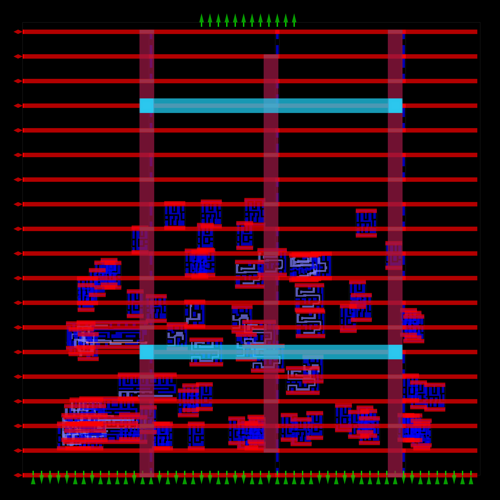

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,area,utilization
global placement,624.349 μm²,25.67 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,internal,switching,leakage,total
sequential,0.000 uW,0.000 uW,0.000 uW,0.000 uW
combinational,0.000 uW,0.000 uW,0.599 uW,0.599 uW
clock,0.000 uW,0.000 uW,0.000 uW,0.000 uW
macro,0.000 uW,0.000 uW,0.000 uW,0.000 uW
pad,0.000 uW,0.000 uW,0.000 uW,0.000 uW
total,0.000 uW,0.000 uW,0.599 uW,0.599 uW


<IPython.core.display.Javascript object>

In [ ]:
#@title Run this cell to synthesize the risc_v_imm_gen_2011 cell {display-mode: "form"}
#@markdown - Click the ▷ button to run synthesis, static timing analysis and global placement

placement_density = 1 #@param {type:"slider", min:0, max:1.0, step:0.01}
clock_period_ps = 10000 #@param {type:"slider", min:0, max:100000, step:1}
clock_period_ns = clock_period_ps / 1000.0
core_area = 'absolute' # @param ["relative", "absolute"]

# @markdown ### core_area_relative
# @markdown compute core area from the design size
utilization_percent = 100 #@param {type:"slider", min:0, max:100, step:1}
# @markdown ### core_area_absolute
# @markdown set core area explicitly
core_width_microns = 50 #@param {type:"slider", min:0, max:1000, step:1}
core_padding_microns = 0 #@param {type:"slider", min:0, max:100, step:1}

from IPython.display import display, display_png
import IPython.display
import PIL.Image

if core_area == 'relative':
  core_area_value = RelativeCoreArea(utilization_percent)
else:
  core_area_value = AbsoluteCoreArea(core_width_microns, core_padding_microns)

tb = widgets.TabBar(['synthesis', 'netlist', 'timing', 'placement', 'area', 'power'])

# run yosys synthesis
with tb.output_to('synthesis', select=True):
  synth_results = run_synthesis()
  tb.clear_tab()

with tb.output_to('synthesis', select=False):
  grid = widgets.Grid(1, 2, header_row=False, header_column=False)
  with grid.output_to(0, 0):
    display(synth_results.cell_stats)
  with grid.output_to(0, 1):
    display(synth_results.design_stats)

# display gate level netlist
with tb.output_to('netlist', select=False):
  with synth_results.synth_v.open('r') as f:
    print(f.read())


# run opensta static timing analysis
with tb.output_to('timing', select=True):
  opensta_results = run_opensta()
  tb.clear_tab()

# display opensta report
with tb.output_to('timing', select=False):
  display(
      opensta_results.style.hide(axis='index')
      .background_gradient(subset=['delay'], cmap='Oranges')
      .bar(subset=['time'], color='lightblue')
  )

# run openroad placement
with tb.output_to('placement', select=True):
  placement_results = run_placement(
      clock_period_ps=clock_period_ps,
      placement_density=placement_density,
      core_area=core_area_value,
  )
  tb.clear_tab()

# display global placement layout
with tb.output_to('placement', select=False):
  if placement_results.openroad_global_placement_layout.exists():
    img = PIL.Image.open(placement_results.openroad_global_placement_layout)
    img = img.resize((500, 500))
    display_png(img)

# display area estimate
with tb.output_to('area', select=False):
  display(
      placement_results.area.style.format('{:.3f} μm²', subset=['area'])
      .format('{:.2f} %', subset=['utilization'])
      .bar(subset=['utilization'], color='lightblue', vmin=0, vmax=100)
  )

# display power metrics
with tb.output_to('power', select=False):
  display(
      placement_results.power.style.format('{:.3f} uW')
      .background_gradient(
          subset=pd.IndexSlice[
              placement_results.power.index[:-1], ['internal', 'switching', 'leakage']
          ],
          cmap='Oranges',
          axis=None,
      )
      .bar(subset=['total'], color='lightcoral')
      .bar(
          subset=pd.IndexSlice[placement_results.power.index[-1:], :],
          color='lightcoral',
          axis='columns',
      )
  )

### Updated RISC-V 2017 Immediate Generate Specification

|Opcode|Integer Value|Instruction|Action|
|:--|:--|:--|:--|
|0110011|51|all R-Type|No Immediate to Generate - Put all 0's for 16 bits|
|0000011|3|lw - I-type|Sign Extend to 32 bits 31 to 20|
|1101111|107|jalr - I-type|Sign Extend to 32 bits: 31, 19 to 12, 20, and 30 to 21|
|0010011|19|All other I-type|Sign Extend to 32 bits 31 to 20|
|0100011|35|sw - SB-type|Sign Extend to 32 bits: 31, 11, 30:25, 11 to 6, and then a 0 bit|
|1100011|99|Branching - SB-Type|Sign Extend to 32 bits: 31, 11, 30:25, 11 to 6, and then a 0 bit|
|0110111|55|lui - U-type|Sign Extend to 32 bits: 31 to 12|
|1101111|111|jal - UJ-Type|Shift Left by 1 - 31, 19:12, 20, 30 to 21 - (added to PC later) and Sign extend|

In [ ]:
%%dslx --top=risc_v_imm_gen_2017 --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

fn risc_v_imm_gen_2017(instr: u32) -> u32{

  // Set the opcode
  let opcode:u7 = instr[0:7];

  // First, perform the simple
  if( opcode == u7:51 ){

      // Return the 32-bit value of 0
      u32:0
  }

  // All I-Type Instructions
  else if( opcode == u7:3 || opcode == u7:107 || opcode == u7:19 ){

      // Extract the immediate
      let immediate:u12 = instr[20:];

      // Check the sign bit at bit 31
      let sign_bit:u1 = instr[31+:u1];

      // Use signex to extend by 0 if positive
      match(sign_bit){
          u1:0 => signex(immediate, u32:0),
          _ => signex(immediate, u32:1)
      }
  }

  // All SB-Type Instructions
  else if( opcode == u7:35 || opcode == u7:99 ){

      // Extract the immediate - 31, 7, 30:25, 11 to 8, and then a 0 bit
      let immediate:u13 = instr[31+:u1] ++ instr[7+:u1] ++ instr[25:31] ++ instr[8:12] ++ u1:0;

      // Check the sign bit at bit 21
      let sign_bit:u1 = instr[31+:u1];

      // Use signex to extend by 0 if positive
      match(sign_bit){
          u1:0 => signex(immediate, u32:0),
          _ => signex(immediate, u32:1)
      }

  }

  // All UJ-Type Instructions
  else if( opcode == u7:111 ){

      // Extract the jump offset and shift left by 1
      let jump_offset:u21 = instr[31+:u1] ++ instr[12:20] ++ instr[20+:u1] ++ instr[21:31] ++ u1:0;

      // Check the sign bit at bit 31
      let sign_bit:u1 = instr[31+:u1];

      // Use signex to extend by 0 if positive
      match(sign_bit){
          u1:0 => signex(jump_offset, u32:0),
          _ => signex(jump_offset, u32:1)
      }

  }

  // lui Instruction - U-type
  else if( opcode == u7:55 ){

      // Extract the lui
      instr[12:] ++ u12:0

  }

  else{
      // Return the 32-bit value of 0
      u32:0
  }

}

#[test]
fn risc_v_imm_gen_2017_test_I_Type() {

  // Opcode for addi = 0010011
  // rd = 22 = 10110
  // funct3 = 010
  // rs1 = 21 = 10101
  // immediate = 32 = 000000100000
  let instr:u32 = u32:0b00000010000010101010101100010011;

  assert_eq(risc_v_imm_gen_2017(instr), u32: 32 );

}


#[test]
fn risc_v_imm_gen_2017_test_lw() {

  // Opcode for lw = 0000011
  // rd = 22 = 10110
  // funct3 = 010
  // rs1 = 21 = 10101
  // immediate = 32 = 000000100000
  let instr:u32 = u32:0b00000010000010101010101100000011;

  assert_eq(risc_v_imm_gen_2017(instr), u32: 32 );

}

#[test]
fn risc_v_imm_gen_2017_test_R_Type() {

  // Opcode for add = 0110011
  // rd = 22 = 10110
  // funct3 = 000
  // rs1 = 21 = 10101
  // rs2 = 22 = 10110
  // funct7 = 0000000
  let instr:u32 = u32:0b00000001011010101000101100110011;

  assert_eq(risc_v_imm_gen_2017(instr), u32: 0 );

}

#[test]
fn risc_v_imm_gen_2017_test_S_Type() {

  // Opcode for sw = 0100011
  // imm[4:0] = 11100
  // funct3 = 010
  // rs1 = 22 = 10110
  // rs2 = 21 = 10101
  // imm[11:7] = 0000000
  let instr:u32 = u32:0b00000011010110110010111000100011;

  assert_eq(risc_v_imm_gen_2017(instr), u32: 60 );

}

#[test]
fn risc_v_imm_gen_2017_test_UJ_Type() {

  // Opcode for jal = 1101111
  // rd = 22 = 10110
  // jump offset is 120 = 0 00000000 0 0000111100 (0) remove for sign extend;
  // Swap the 00000000 and 0000111100
  // Breakdown: 0 0000111100 0 00000000
  let instr:u32 = u32:0b00000111100000000000101101101111;

  assert_eq(risc_v_imm_gen_2017(instr), u32:0b000000000000000001111000 );

}

#[test]
fn risc_v_imm_gen_2017_test_U_Type() {

  // Opcode for lui = 0110111
  // rd = 18 = 10010
  // lui = 248 = 00000000000011111000;
  let instr:u32 = u32:0b00000000000011111000100100110111;

  // Expected Result: 0b00000000000011111000000000000000
  assert_eq(risc_v_imm_gen_2017(instr), u32: 0b00000000000011111000000000000000 );

}

In [ ]:
#@title Run this cell to synthesize the risc_v_imm_gen_2017 cell {display-mode: "form"}
#@markdown - Click the ▷ button to run synthesis, static timing analysis and global placement

placement_density = 1 #@param {type:"slider", min:0, max:1.0, step:0.01}
clock_period_ps = 10000 #@param {type:"slider", min:0, max:100000, step:1}
clock_period_ns = clock_period_ps / 1000.0
core_area = 'absolute' # @param ["relative", "absolute"]

# @markdown ### core_area_relative
# @markdown compute core area from the design size
utilization_percent = 100 #@param {type:"slider", min:0, max:100, step:1}
# @markdown ### core_area_absolute
# @markdown set core area explicitly
core_width_microns = 50 #@param {type:"slider", min:0, max:1000, step:1}
core_padding_microns = 0 #@param {type:"slider", min:0, max:100, step:1}

from IPython.display import display, display_png
import IPython.display
import PIL.Image

if core_area == 'relative':
  core_area_value = RelativeCoreArea(utilization_percent)
else:
  core_area_value = AbsoluteCoreArea(core_width_microns, core_padding_microns)

tb = widgets.TabBar(['synthesis', 'netlist', 'timing', 'placement', 'area', 'power'])

# run yosys synthesis
with tb.output_to('synthesis', select=True):
  synth_results = run_synthesis()
  tb.clear_tab()

with tb.output_to('synthesis', select=False):
  grid = widgets.Grid(1, 2, header_row=False, header_column=False)
  with grid.output_to(0, 0):
    display(synth_results.cell_stats)
  with grid.output_to(0, 1):
    display(synth_results.design_stats)

# display gate level netlist
with tb.output_to('netlist', select=False):
  with synth_results.synth_v.open('r') as f:
    print(f.read())


# run opensta static timing analysis
with tb.output_to('timing', select=True):
  opensta_results = run_opensta()
  tb.clear_tab()

# display opensta report
with tb.output_to('timing', select=False):
  display(
      opensta_results.style.hide(axis='index')
      .background_gradient(subset=['delay'], cmap='Oranges')
      .bar(subset=['time'], color='lightblue')
  )

# run openroad placement
with tb.output_to('placement', select=True):
  placement_results = run_placement(
      clock_period_ps=clock_period_ps,
      placement_density=placement_density,
      core_area=core_area_value,
  )
  tb.clear_tab()

# display global placement layout
with tb.output_to('placement', select=False):
  if placement_results.openroad_global_placement_layout.exists():
    img = PIL.Image.open(placement_results.openroad_global_placement_layout)
    img = img.resize((500, 500))
    display_png(img)

# display area estimate
with tb.output_to('area', select=False):
  display(
      placement_results.area.style.format('{:.3f} μm²', subset=['area'])
      .format('{:.2f} %', subset=['utilization'])
      .bar(subset=['utilization'], color='lightblue', vmin=0, vmax=100)
  )

# display power metrics
with tb.output_to('power', select=False):
  display(
      placement_results.power.style.format('{:.3f} uW')
      .background_gradient(
          subset=pd.IndexSlice[
              placement_results.power.index[:-1], ['internal', 'switching', 'leakage']
          ],
          cmap='Oranges',
          axis=None,
      )
      .bar(subset=['total'], color='lightcoral')
      .bar(
          subset=pd.IndexSlice[placement_results.power.index[-1:], :],
          color='lightcoral',
          axis='columns',
      )
  )

## Results - We Proved the RISC-V Inventors Claim!

In our comparison of results, we obtained the following:

|Metric|RISC-V 2011|RISC-V 2017|Improvement|
|:--|:--|:--|:--|
|time - Under the delay tab| 1.02 | 0.77 | 2017 by 24.51% |
|global placement - under the area tab| 624.349 μm² | 465.446 μm² | 2017 by 25.45% |
|combinational - under the power tab| 0.599 μW | 0.592 μW | 2017 by 1.16% |

We may conclude that the 2017 RISC-V redesign gained an improvement in 24.51% in <b>area</b> and a 25.45% improvement in <b>performance</b> with a slight improvement in power consumption of 1.16%.

> To quote the movie "Oppenheimer" - It's paradoxical, and yet... it works!

## Combining Concepts: DSLX structs, match statements, and the RISC-V 2017 Immediate Generate

Keeping track of all these bits and bytes is challenging, even for the most advanced programmers. So let us revisit the idea of DSLX structs and re-write the <code>risc_v_imm_gen_2017</code> module with a RISC-V instruction struct.

Revisiting the 2017 specification, we can observe some patterns

<img src = "https://github.com/mmorri22/cse30321/blob/main/xls/lec24/updated_immediate.png?raw=true" width=600>

## In-Class Reading Review - Lecture 25

> Before we start, be sure to run the first two steps to initialize the XLS and OpenRoad script so you mau continue your coding.

Discuss for 3-minutes, then class discussion:
<ul>
  <li>Define <b>Hardware Description Languages</b></li>
  <li>Describe <b>domain-specific language</b></li>
  <li>Describe <b>Intermediate representation</b></li>
  <li>Describe <b>Process Development Kit</b></li>
  <li>Describe <b>Separation of Concerns</b></li>
  <li>Describe <b>Standard Cells</b></li>
</ul>

### DSLX Structs

Let's base our struct upon the R-Type instruction. We will then use <code>let</code> statements to split in the new module. DSLX structs are similar to C structs, except every element is separated by a <code>,</code> instead of a <code>;</code>. And because they are aligned by bits, they match to exact sizes of the C struct.

<br><code>
struct INSTR{</br>
&nbsp&nbsp&nbsp&nbspfunct7: u7,</br>
&nbsp&nbsp&nbsp&nbsprs2: u5,</br>
&nbsp&nbsp&nbsp&nbsprs1: u5,</br>
&nbsp&nbsp&nbsp&nbspfunct3: u3,</br>
&nbsp&nbsp&nbsp&nbsprd: u5,</br>
&nbsp&nbsp&nbsp&nbspopcode: u7</br>
}</br>
</code>

In [ ]:
%%dslx --top=risc_v_imm_gen --pipeline_stages=1 --flop_inputs=false --flop_outputs=false

struct INSTR{
    funct7: u7,
    rs2: u5,
    rs1: u5,
    funct3: u3,
    rd: u5,
    opcode: u7
}

fn risc_v_imm_gen(instr: INSTR) -> u32{

  // First, perform the simple
  if( instr.opcode == u7:51 ){

      // Return the 32-bit value of 0
      u32:0
  }

  // All I-Type Instructions
  else if( instr.opcode == u7:3 || instr.opcode == u7:107 || instr.opcode == u7:19 ){

      // Extract the immediate
      let immediate:u12 = instr.funct7 ++ instr.rs2;

      // Check the sign bit at funct7[6]
      let sign_bit:u1 = instr.funct7[6+:u1];

      // Use signex to extend by 0 if positive - Equivalent match statement
      match (sign_bit){
          u1:0 => signex(immediate, u32:0),

          // trailing irrefutable pattern
          _ => signex(immediate, u32:1)
      }
  }

  // All SB-Type Instructions
  else if( instr.opcode == u7:35 || instr.opcode == u7:99 ){

      // Extract the immediate - 31, 7, 30:25, 11 to 8, and then a 0 bit
      // LSB on left
      let immediate:u13 = instr.funct7[6+:u1] ++ instr.rd[0+:u1] ++ instr.funct7[0:6] ++ instr.rd[1:] ++ u1:0;

      // Check the sign bit at bit 21
      let sign_bit:u1 = instr.funct7[6+:u1];

      // Use signex to extend by 0 if positive - Equivalent match statement
      match (sign_bit){
          u1:0 => signex(immediate, u32:0),

          // trailing irrefutable pattern
          _ => signex(immediate, u32:1)
      }

  }

  // All UJ-Type Instructions
  else if( instr.opcode == u7:111 ){

      // Extract the jump offset and shift left by 1
      let jump_offset:u21 = instr.funct7[6+:u1] ++ instr.rs1 ++ instr.funct3 ++ instr.rs2[0+:u1] ++ instr.funct7[0:6] ++ instr.rs2[1:] ++ u1:0;

      // Check the sign bit at bit 31
      let sign_bit:u1 = instr.funct7[6+:u1];

      // Use signex to extend by 0 if positive - Equivalent match statement
      match (sign_bit){
          u1:0 => signex(jump_offset, u32:0),

          // trailing irrefutable pattern
          _ => signex(jump_offset, u32:1)
      }

  }

  // lui Instruction - U-type
  else if( instr.opcode == u7:55 ){

      // Extract the lui
      instr.funct7 ++ instr.rs2 ++ instr.rs1 ++ instr.funct3 ++ u12:0

  }

  else{
      // Return the 32-bit value of 0
      u32:0
  }

}

#[test]
fn risc_v_imm_gen_2017_test_I_Type() {

  // Opcode for addi = 0010011
  // rd = 22 = 10110
  // funct3 = 010
  // rs1 = 21 = 10101
  // immediate = 32 = 000000100000
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10000, rs1:u5:0b10101, funct3:u3:0b010, rd:u5:0b10110, opcode:u7:0b0000011};
  assert_eq(risc_v_imm_gen(instr), u32: 16 );

  let instr = INSTR{ funct7:u7:0b1111111, rs2:u5:0b10000, rs1:u5:0b10101, funct3:u3:0b010, rd:u5:0b10110, opcode:u7:0b0000011};
  assert_eq(risc_v_imm_gen(instr), u32: 4294967280 );

}

#[test]
fn risc_v_imm_gen_test_lw() {

  // Opcode for lw = 0000011
  // rd = 22 = 10110
  // funct3 = 010
  // rs1 = 21 = 10101
  // immediate = 32 = 000000100000
  // 0b00000010000010101010101100000011;

  let instr = INSTR{ funct7:u7:0b0000001, rs2:u5:0b10000, rs1:u5:0b10101, funct3:u3:0b010, rd:u5:0b10110, opcode:u7:0b0000011};
  assert_eq(risc_v_imm_gen(instr), u32: 48 );

}

#[test]
fn risc_v_imm_gen_test_R_Type() {

  // Opcode for add = 0110011
  // rd = 22 = 10110
  // funct3 = 000
  // rs1 = 21 = 10101
  // rs2 = 22 = 10110
  // funct7 = 0000000
  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b10110, rs1:u5:0b10101, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b0110011};

  assert_eq(risc_v_imm_gen(instr), u32: 0 );

}

#[test]
fn risc_v_imm_gen_test_S_Type() {

  // Opcode for sw = 0100011
  // imm[4:0] = 11100
  // funct3 = 010
  // rs1 = 22 = 10110
  // rs2 = 21 = 10101
  // imm[11:7] = 0000000
  // instr:u32 = u32:0b00000011010110110010111000100011;

  let instr = INSTR{ funct7:u7:0b0000001, rs2:u5:0b10101, rs1:u5:0b10110, funct3:u3:0b010, rd:u5:0b11100, opcode:u7:0b0100011};

  assert_eq(risc_v_imm_gen(instr), u32: 60 );

}

#[test]
fn risc_v_imm_gen_test_UJ_Type() {

  // Opcode for jal = 1101111
  // rd = 22 = 10110
  // jump offset is 120 = 0 00000000 0 0000111100 (0) remove for sign extend;
  // Swap the 00000000 and 0000111100
  // Breakdown: 0 0000111100 0 00000000
  // let instr:u32 = u32:0b00000111100000000000101101101111;

  let instr = INSTR{ funct7:u7:0b0000011, rs2:u5:0b11000, rs1:u5:0b00000, funct3:u3:0b000, rd:u5:0b10110, opcode:u7:0b1101111};

  assert_eq(risc_v_imm_gen(instr), u32:0b000000000000000001111000 );

}

#[test]
fn risc_v_imm_gen_test_U_Type() {

  // Opcode for lui = 0110111
  // rd = 18 = 10010
  // lui = 248 = 00000000000011111000;
  // let instr:u32 = u32:0b00000000000011111000100100110111;

  let instr = INSTR{ funct7:u7:0b0000000, rs2:u5:0b00000, rs1:u5:0b11111, funct3:u3:0b000, rd:u5:0b10010, opcode:u7:0b0110111};

  // Expected Result: 0b00000000000011111000000000000000
  assert_eq(risc_v_imm_gen(instr), u32: 0b00000000000011111000000000000000 );

}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ RUN UNITTEST  ] risc_v_imm_gen_2017_test_I_Type
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_test_lw
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_test_R_Type
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_test_S_Type
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_test_UJ_Type
[            OK ]
[ RUN UNITTEST  ] risc_v_imm_gen_test_U_Type
[            OK ]
[===============] 6 test(s) ran; 0 failed; 0 skipped.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__risc_v_imm_gen(instr: (bits[7], bits[5], bits[5], bits[3], bits[5], bits[7])) -> bits[32] {
  instr_funct7__5: bits[7] = tuple_index(instr, index=0, id=71, pos=[(0,62,33)])
  literal.72: bits[7] = literal(value=6, id=72, pos=[(0,62,41)])
  dynamic_bit_slice.73: bits[1] = dynamic_bit_slice(instr_funct7__5, literal.72, width=1, id=73, pos=[(0,62,40)])
  instr_rs1: bits[5] = tuple_index(instr, index=2, id=74, pos=[(0,62,56)])
  concat.75: bits[6] = concat(dynamic_bit_slice.73, instr_rs1, id=75, pos=[(0,62,48)])
  instr_funct3: bits[3] = tuple_index(instr, index=3, id=76, pos=[(0,62,69)])
  instr_rs2__1: bits[5] = tuple_index(instr, index=1, id=78, pos=[(0,62,85)])
  literal.79: bits[5] = literal(value=0, id=79, pos=[(0,62,90)])
  concat.77: bits[9] = concat(concat.75, instr_funct3, id=77, pos=[(0,62,61)])
  dynamic_bit_slice.80: bits[1] = dynamic_bit_slice(instr_rs2__1, literal.79, width=1, id=80, pos=[

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

package user_module

file_number 0 "xls_work_dir/user_module.x"

top fn __user_module__risc_v_imm_gen(instr: (bits[7], bits[5], bits[5], bits[3], bits[5], bits[7])) -> bits[32] {
  instr_opcode__7: bits[7] = tuple_index(instr, index=5, id=103, pos=[(0,78,16)])
  literal.7: bits[7] = literal(value=3, id=7, pos=[(0,21,27)])
  literal.10: bits[7] = literal(value=107, id=10, pos=[(0,21,51)])
  literal.14: bits[7] = literal(value=19, id=14, pos=[(0,21,77)])
  literal.34: bits[7] = literal(value=35, id=34, pos=[(0,39,27)])
  literal.37: bits[7] = literal(value=99, id=37, pos=[(0,39,52)])
  instr_funct7__7: bits[7] = tuple_index(instr, index=0, id=90, pos=[(0,65,29)])
  instr_rs2__1: bits[5] = tuple_index(instr, index=1, id=78, pos=[(0,62,85)])
  instr_rd: bits[5] = tuple_index(instr, index=4, id=43, pos=[(0,43,54)])
  eq.8: bits[1] = eq(instr_opcode__7, literal.7, id=8, pos=[(0,21,24)])
  eq.11: bits[1] = eq(instr_opcode__7, literal.10, id=11, pos=[(0,21,48)])
  eq.15: bits[1] = eq(instr_opc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

module user_module(
  input wire clk,
  input wire [31:0] instr,
  output wire [31:0] out
);
  // ===== Pipe stage 0:
  wire [6:0] p0_instr_opcode__7_comb;
  wire [6:0] p0_instr_funct7__7_comb;
  wire [4:0] p0_instr_rs2__1_comb;
  wire [4:0] p0_instr_rd_comb;
  wire p0_sign_bit__2_comb;
  wire [4:0] p0_instr_rs1_comb;
  wire [2:0] p0_instr_funct3_comb;
  wire p0_or_407_comb;
  wire [19:0] p0_concat_412_comb;
  wire [11:0] p0_concat_413_comb;
  wire [10:0] p0_concat_414_comb;
  wire [3:0] p0_concat_415_comb;
  assign p0_instr_opcode__7_comb = instr[6:0];
  assign p0_instr_funct7__7_comb = instr[31:25];
  assign p0_instr_rs2__1_comb = instr[24:20];
  assign p0_instr_rd_comb = instr[11:7];
  assign p0_sign_bit__2_comb = p0_instr_funct7__7_comb[6];
  assign p0_instr_rs1_comb = instr[19:15];
  assign p0_instr_funct3_comb = instr[14:12];
  assign p0_or_407_comb = p0_instr_opcode__7_comb == 7'h03 | p0_instr_opcode__7_comb == 7'h6b | p0_instr_opcode__7_comb == 7'h13;
  assign p0_concat_412_com

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

stage,node,node_delay_ps,path_delay_ps
0,instr,0,0
0,instr_opcode__7,0,0
0,literal.7,0,0
0,literal.10,0,0
0,literal.14,0,0
0,literal.34,0,0
0,literal.37,0,0
0,instr_funct7__7,0,0
0,instr_rs2__1,0,0
0,instr_rd,0,0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,stats
sky130_fd_sc_hd__a21o_1,22
sky130_fd_sc_hd__a22o_1,4
sky130_fd_sc_hd__a31oi_1,2
sky130_fd_sc_hd__a32o_1,1
sky130_fd_sc_hd__and2_0,7
sky130_fd_sc_hd__and3_1,2
sky130_fd_sc_hd__clkinv_1,1
sky130_fd_sc_hd__lpflow_inputiso1p_1,1
sky130_fd_sc_hd__lpflow_isobufsrc_1,1
sky130_fd_sc_hd__nand2_1,3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,cells
num_wires,25.0000
num_wire_bits,87.0000
num_pub_wires,25.0000
num_pub_wire_bits,87.0000
num_memories,0.0000
num_memory_bits,0.0000
num_processes,0.0000
num_cells,54.0000
area,366.6016


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/* Generated by Yosys 0.38+92 (git sha1 84116c9a3, x86_64-conda-linux-gnu-cc 11.2.0 -fvisibility-inlines-hidden -fmessage-length=0 -march=nocona -mtune=haswell -ftree-vectorize -fPIC -fstack-protector-strong -fno-plt -O2 -ffunction-sections -fdebug-prefix-map=/root/conda-eda/conda-eda/workdir/conda-env/conda-bld/yosys_1708682838165/work=/usr/local/src/conda/yosys-0.38_93_g84116c9a3 -fdebug-prefix-map=/content/conda-env=/usr/local/src/conda-prefix -fPIC -Os -fno-merge-constants) */

(* hdlname = "user_module" *)
(* top =  1  *)
(* src = "/content/xls_work_dir/user_module.sv:1.1-32.10" *)
module user_module(clk, instr, out);
  (* src = "/content/xls_work_dir/user_module.sv:2.14-2.17" *)
  input clk;
  wire clk;
  (* src = "/content/xls_work_dir/user_module.sv:3.21-3.26" *)
  input [31:0] instr;
  wire [31:0] instr;
  (* src = "/content/xls_work_dir/user_module.sv:4.22-4.25" *)
  output [31:0] out;
  wire [31:0] out;
  wire out_sky130_fd_sc_hd__a21o_1_X_13_B1;
  wire out_sky130_fd_sc_hd__

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

delay,time,edge,net,gate
0.000000,0.000000,v,input,external delay
0.000000,0.000000,v,instr[6],in
0.130000,0.130000,v,out_sky130_fd_sc_hd__and2_0_X_B_sky130_fd_sc_hd__nand2_1_Y_A_sky130_fd_sc_hd__or3_1_X_B_sky130_fd_sc_hd__lpflow_inputiso1p_1_X/X,sky130_fd_sc_hd__lpflow_inputiso1p_1
0.230000,0.360000,v,out_sky130_fd_sc_hd__and2_0_X_B_sky130_fd_sc_hd__nand2_1_Y_A_sky130_fd_sc_hd__or3_1_X/X,sky130_fd_sc_hd__or3_1
0.380000,0.740000,^,out_sky130_fd_sc_hd__and2_0_X_B_sky130_fd_sc_hd__nand2_1_Y_A_sky130_fd_sc_hd__a31oi_1_A2/Y,sky130_fd_sc_hd__a31oi_1
0.020000,0.770000,^,out_sky130_fd_sc_hd__a21o_1_X_3/X,sky130_fd_sc_hd__a21o_1
0.000000,0.770000,^,out[20],out


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

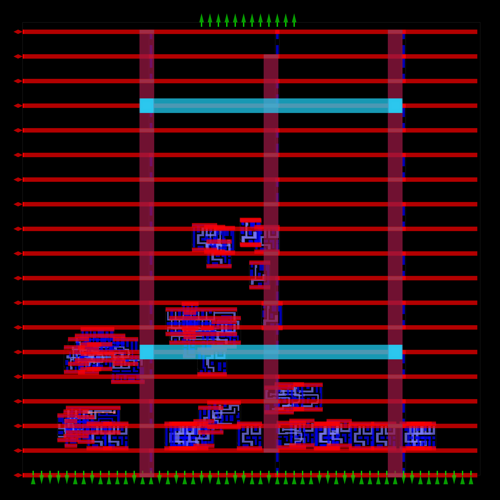

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,area,utilization
global placement,465.446 μm²,19.14 %


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,internal,switching,leakage,total
sequential,0.000 uW,0.000 uW,0.000 uW,0.000 uW
combinational,0.000 uW,0.000 uW,0.592 uW,0.592 uW
clock,0.000 uW,0.000 uW,0.000 uW,0.000 uW
macro,0.000 uW,0.000 uW,0.000 uW,0.000 uW
pad,0.000 uW,0.000 uW,0.000 uW,0.000 uW
total,0.000 uW,0.000 uW,0.592 uW,0.592 uW


<IPython.core.display.Javascript object>

In [ ]:
#@title Run this cell to synthesize the risc_v_imm_gen cell with the Struct {display-mode: "form"}
#@markdown - Click the ▷ button to run synthesis, static timing analysis and global placement

placement_density = 1 #@param {type:"slider", min:0, max:1.0, step:0.01}
clock_period_ps = 10000 #@param {type:"slider", min:0, max:100000, step:1}
clock_period_ns = clock_period_ps / 1000.0
core_area = 'absolute' # @param ["relative", "absolute"]

# @markdown ### core_area_relative
# @markdown compute core area from the design size
utilization_percent = 100 #@param {type:"slider", min:0, max:100, step:1}
# @markdown ### core_area_absolute
# @markdown set core area explicitly
core_width_microns = 50 #@param {type:"slider", min:0, max:1000, step:1}
core_padding_microns = 0 #@param {type:"slider", min:0, max:100, step:1}

from IPython.display import display, display_png
import IPython.display
import PIL.Image

if core_area == 'relative':
  core_area_value = RelativeCoreArea(utilization_percent)
else:
  core_area_value = AbsoluteCoreArea(core_width_microns, core_padding_microns)

tb = widgets.TabBar(['synthesis', 'netlist', 'timing', 'placement', 'area', 'power'])

# run yosys synthesis
with tb.output_to('synthesis', select=True):
  synth_results = run_synthesis()
  tb.clear_tab()

with tb.output_to('synthesis', select=False):
  grid = widgets.Grid(1, 2, header_row=False, header_column=False)
  with grid.output_to(0, 0):
    display(synth_results.cell_stats)
  with grid.output_to(0, 1):
    display(synth_results.design_stats)

# display gate level netlist
with tb.output_to('netlist', select=False):
  with synth_results.synth_v.open('r') as f:
    print(f.read())


# run opensta static timing analysis
with tb.output_to('timing', select=True):
  opensta_results = run_opensta()
  tb.clear_tab()

# display opensta report
with tb.output_to('timing', select=False):
  display(
      opensta_results.style.hide(axis='index')
      .background_gradient(subset=['delay'], cmap='Oranges')
      .bar(subset=['time'], color='lightblue')
  )

# run openroad placement
with tb.output_to('placement', select=True):
  placement_results = run_placement(
      clock_period_ps=clock_period_ps,
      placement_density=placement_density,
      core_area=core_area_value,
  )
  tb.clear_tab()

# display global placement layout
with tb.output_to('placement', select=False):
  if placement_results.openroad_global_placement_layout.exists():
    img = PIL.Image.open(placement_results.openroad_global_placement_layout)
    img = img.resize((500, 500))
    display_png(img)

# display area estimate
with tb.output_to('area', select=False):
  display(
      placement_results.area.style.format('{:.3f} μm²', subset=['area'])
      .format('{:.2f} %', subset=['utilization'])
      .bar(subset=['utilization'], color='lightblue', vmin=0, vmax=100)
  )

# display power metrics
with tb.output_to('power', select=False):
  display(
      placement_results.power.style.format('{:.3f} uW')
      .background_gradient(
          subset=pd.IndexSlice[
              placement_results.power.index[:-1], ['internal', 'switching', 'leakage']
          ],
          cmap='Oranges',
          axis=None,
      )
      .bar(subset=['total'], color='lightcoral')
      .bar(
          subset=pd.IndexSlice[placement_results.power.index[-1:], :],
          color='lightcoral',
          axis='columns',
      )
  )

# 📄 README

Like what you see? 🤝 [Contact us](https://docs.google.com/forms/d/e/1FAIpQLSd1DNMoOxxr73mkIrZXhDWd1gn-jSsL7SMQry6y_JK0caDKlg/viewform?resourcekey=0-1YtZY34PHo-vug_UmFrMQg) 💬 [Join the chat](https://chat.google.com/room/AAAA8aUpxQc?cls=4)

# 🔒 Privacy

 `%%dslx` cell execution count is tracked using [Google Analytics](https://developers.google.com/analytics).